# Kaggle Competition:  Iceberg or Ship

# resnext50 architecture 

## increase epochs


---
## Import libraries

In [1]:
!ls -l

total 4352
-rw-rw-r-- 1 ubuntu ubuntu 1405706 Jan 15 01:35 1b_getdata-csv.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   13742 Jan 15 01:35 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   64965 Jan 14 19:40 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  147078 Jan 14 19:57 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  138629 Jan 14 19:52 6_resnext50_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  205624 Jan 15 02:37 7_1_resnext50_more_epoch_submitted.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   49250 Jan 15 16:52 7_2_resnext50_more_epoch.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  218915 Jan 15 03:22 7_5_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  179449 Jan 14 21:28 7_resnext50_sz_100.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  201400 Jan 15 02:17 8_resnext50_more_epoch_sz300.ipynb
-rw-rw-r-- 1 ub

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
!ls -l {PATH}

total 1973264
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  9 00:38 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan 15 14:20 sub
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan 14 18:44 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 12 ubuntu ubuntu       4096 Jan 15 13:38 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 valid


In [7]:
np.random.seed(0)

## Set Architecture

In [8]:
arch=resnext50
sz=200
bs=32
lr = 0.005

In [9]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.4), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 264/264 [01:20<00:00,  3.29it/s]


### Learning Rate Finder

In [11]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 39%|███▉      | 16/41 [00:00<00:00, 28.62it/s, loss=3.65] 


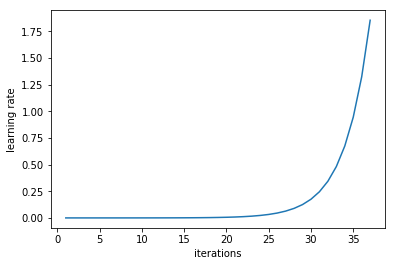

In [12]:
learn.sched.plot_lr()

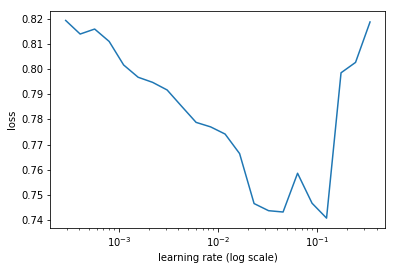

In [13]:
learn.sched.plot() 

In [14]:
learn.fit(lr, 10)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[0.      0.53648 0.5541  0.70171]                          
[1.      0.43886 0.38893 0.8125 ]                          
[2.      0.43411 0.35774 0.82102]                          
[3.      0.40166 0.37136 0.82671]                          
[4.      0.38497 0.38369 0.81534]                          
[5.      0.35851 0.38125 0.81534]                          
[6.      0.32765 0.35433 0.82102]                          
[7.      0.3257  0.38188 0.82954]                          
[8.      0.32145 0.3746  0.84659]                          
[9.      0.31764 0.38115 0.83239]                          



### Stochastic Gradient Descent with Restart

In [15]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 6, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

[0.      0.44967 0.33133 0.84375]                          
[1.      0.45333 0.32424 0.85227]                          
[2.      0.43156 0.3264  0.84659]                          
[3.      0.41209 0.31666 0.84943]                          
[4.      0.41544 0.33222 0.82954]                          
[5.      0.39065 0.31653 0.84659]                          
[6.      0.37903 0.32075 0.84375]                          
[7.      0.38897 0.33297 0.83239]                          
[8.      0.37957 0.32438 0.84375]                          
[9.      0.4008  0.31355 0.85227]                          
[10.       0.42475  0.3272   0.84375]                      
[11.       0.41092  0.32549  0.85796]                      
[12.       0.40002  0.3267   0.84091]                      
[13.       0.38353  0.32161  0.84091]                      
[14.       0.37151  0.3234   0.84375]                      
[15.       0.37986  0.32918  0.83523]                      
[16.       0.38258  0.32124  0.84375]   

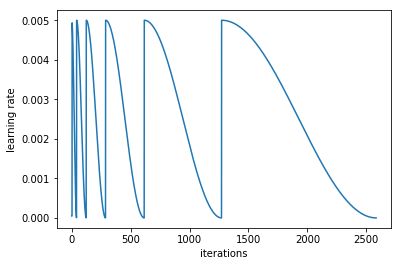

In [16]:
learn.sched.plot_lr()

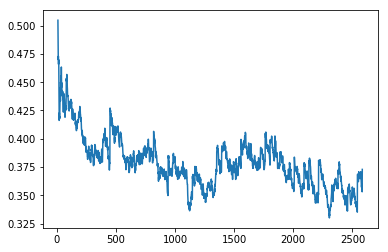

In [17]:
learn.sched.plot_loss()

In [18]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2939834827147395, 0.8722741433021807)

### Unfreeze Layers

In [19]:
# unfreeze layers
learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
lrs = np.array([lr/9,lr/3,lr/1])

#wd = 0.025
#wds=[wd/100, wd/10, wd]
#wds=[0.0025,0.025,0.25]


### Run Learner Again

In [20]:
learn.fit(lrs, 6, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

[0.      0.61326 0.43311 0.79546]                          
[1.      0.60955 0.84851 0.71875]                          
[2.      0.54191 0.60438 0.67614]                          
[3.      0.50616 0.68645 0.69318]                          
[4.      0.49301 0.69229 0.67614]                          
[5.      0.46209 0.61928 0.6875 ]                          
[6.      0.45162 0.6356  0.67614]                          
[7.      0.44667 0.88649 0.65057]                          
[8.      0.44144 0.61111 0.71023]                          
[9.      0.44139 0.54177 0.73296]                          
[10.       0.40562  0.64604  0.69886]                      
[11.       0.41071  0.50083  0.76136]                      
[12.       0.40728  0.54395  0.75   ]                      
[13.       0.37558  0.50935  0.76704]                      
[14.       0.37284  0.4839   0.77273]                      
[15.       0.38092  0.5862   0.74148]                      
[16.       0.38286  0.43557  0.80114]   

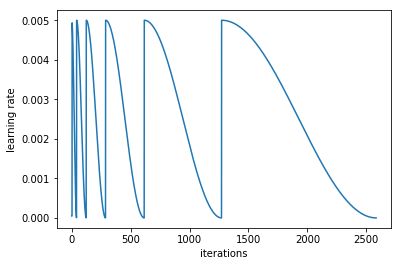

In [21]:
learn.sched.plot_lr()

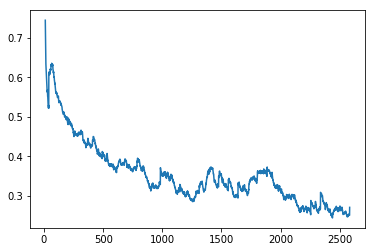

In [22]:
learn.sched.plot_loss()

In [23]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.26931735175919136, 0.8847352024922118)

In [24]:
learn.save('resnext50_sz200_zm14')

In [25]:
learn.load('resnext50_sz200_zm14')

In [26]:
#helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz200_zm14.csv')

In [27]:
# End here


### Run Learner again

In [28]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.29215 0.39612 0.85227]                          
[1.      0.30875 0.34448 0.85511]                          
[2.      0.28665 0.3103  0.875  ]                          
[3.      0.28786 0.39548 0.83807]                          
[4.      0.31165 0.38228 0.83239]                          
[5.      0.28537 0.35878 0.86648]                          
[6.      0.27897 0.35017 0.86079]                          
[7.      0.47503 0.54495 0.73296]                          
[8.      0.54585 0.51869 0.77273]                          
[9.      0.55266 0.38205 0.80682]                          
[10.       0.5008   0.36031  0.82386]                      
[11.       0.4642   0.37627  0.80682]                      
[12.       0.43219  0.34665  0.82954]                      
[13.       0.43338  0.33244  0.84091]                      
[14.       0.433    0.35728  0.82386]                      
[15.       0.43699  0.33857  0.84375]                      
[16.       0.4349   0.32925  0.82386]   

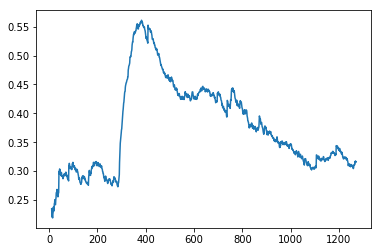

In [29]:
learn.sched.plot_loss()

In [30]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2844552046736451, 0.8629283489096573)

### Run Learner again

In [31]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.34583 0.32001 0.84091]                          
[1.      0.33123 0.34894 0.84659]                          
[2.      0.32352 0.27838 0.89204]                          
[3.      0.32043 0.344   0.84375]                          
[4.      0.3426  0.32372 0.86079]                          
[5.      0.32046 0.27913 0.87216]                          
[6.      0.3035  0.28727 0.86648]                          
[7.      0.30142 0.37639 0.82671]                          
[8.      0.29589 0.34287 0.84943]                          
[9.      0.28517 0.27845 0.87216]                          
[10.       0.28706  0.32183  0.85796]                      
[11.       0.27668  0.2912   0.875  ]                      
[12.       0.31022  0.26975  0.87784]                      
[13.       0.27496  0.2767   0.88068]                      
[14.       0.27164  0.27112  0.88068]                      
[15.       0.28745  0.28495  0.87216]                      
[16.       0.36983  0.29913  0.86932]   

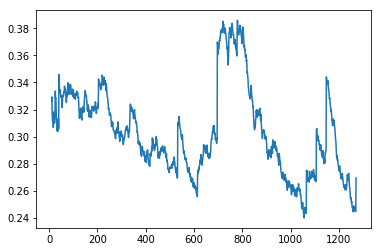

In [32]:
learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [33]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2720286523382322, 0.8940809968847352)

In [34]:
learn.save('resnext50_sz200_zm14_learn')

In [35]:
learn.load('resnext50_sz200_zm14_learn')

## Save predictions

In [36]:
#helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz150_zm14_learn.csv')

In [37]:
# test_df = pd.read_json(PATH+"/test.json")
# helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_zm15_bs32_comp_band',
#                       classes=data.classes,
#                       submission_folder =f'{PATH}sub'
#                      )